# Classification EEG using LSTM

## Import library

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

/home/neuro/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


## Load dataset

In [12]:
import numpy as np
filename = 'data/eeg/sub-01/preprocessed_eeg_training.npy'
eeg_data = np.load(filename, allow_pickle=True).item()['preprocessed_eeg_data']
eeg_shape = eeg_data.shape
eeg_data = eeg_data.reshape(eeg_shape[0], eeg_shape[2], eeg_shape[3]*eeg_shape[1])

filename = 'data/img/image_metadata.npy'
label_data = np.load(filename, allow_pickle=True).item()['train_img_concepts']
label_data = [x[6:] for x in label_data]

## Convert EEG to melspectrogram

In [45]:
data = eeg_data[0,0,:]
sr = 0.01
S = librosa.feature.melspectrogram(y=data, sr=sr, n_fft=256, n_mels=201, hop_length=2)  
S_dB = librosa.power_to_db(S, ref=np.max)

## Plot

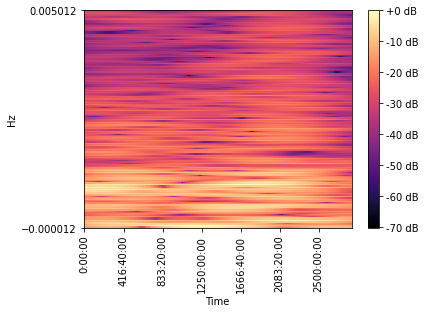

In [52]:
img = librosa.display.specshow(S_dB, x_axis='time',
                        y_axis='mel', sr=sr)
plt.colorbar(img, format='%+2.0f dB')
plt.xticks(rotation=90) 
plt.show()

## External test

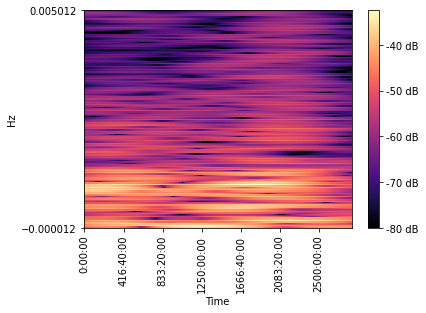

In [57]:
S = librosa.feature.melspectrogram(y=eeg_data, sr=sr, n_fft=256, n_mels=201, hop_length=2)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB[0,0,:,:], x_axis='time',
                        y_axis='mel', sr=sr)
plt.colorbar(img, format='%+2.0f dB')
plt.xticks(rotation=90) 
plt.show()